In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5) # make figures larger

First we will check the distribution of our data. 
To do this we will load the meta data csv for train set.
Then we will count the number of unique labels and the number of data with that label.
Using the sample number information we will choose which classes to use

In [2]:
file = pd.read_csv("./data/FSDKaggle2018.meta/train_post_competition.csv",usecols=['label'])

unique_labels,occurance = np.unique(file.values,return_counts=True)
print(unique_labels)

['Acoustic_guitar' 'Applause' 'Bark' 'Bass_drum' 'Burping_or_eructation'
 'Bus' 'Cello' 'Chime' 'Clarinet' 'Computer_keyboard' 'Cough' 'Cowbell'
 'Double_bass' 'Drawer_open_or_close' 'Electric_piano' 'Fart'
 'Finger_snapping' 'Fireworks' 'Flute' 'Glockenspiel' 'Gong'
 'Gunshot_or_gunfire' 'Harmonica' 'Hi-hat' 'Keys_jangling' 'Knock'
 'Laughter' 'Meow' 'Microwave_oven' 'Oboe' 'Saxophone' 'Scissors'
 'Shatter' 'Snare_drum' 'Squeak' 'Tambourine' 'Tearing' 'Telephone'
 'Trumpet' 'Violin_or_fiddle' 'Writing']


To visualize sample distribution we can plot the number of samples belonging to each class as a bar chart. 
But first we will sort it to see which classes has higher number of samples compared to others

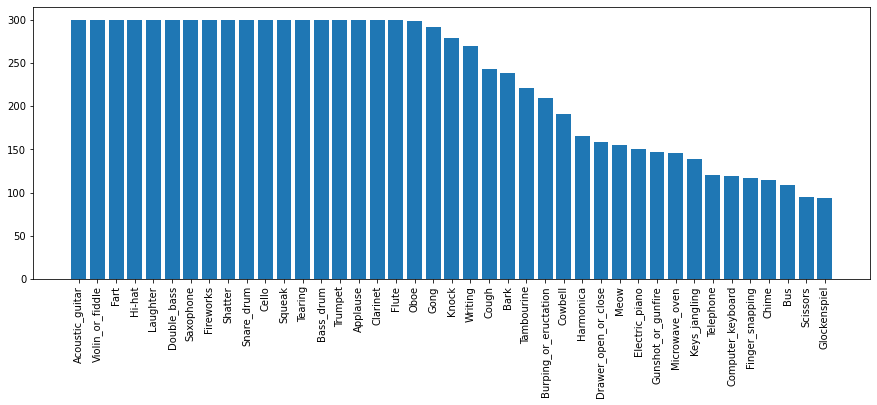

In [3]:
p = (-occurance).argsort()

y_pos=np.arange(len(occurance[p]))

plt.xticks(y_pos,unique_labels[p],rotation=90)
plt.bar(y_pos,occurance[p])
plt.show()

Most of the classes has similar number of samples. 
However it can be seen that number of samples start to decline after the class "Gong".
Now we will plot only a portion of our figure which is upto the "Gong" class

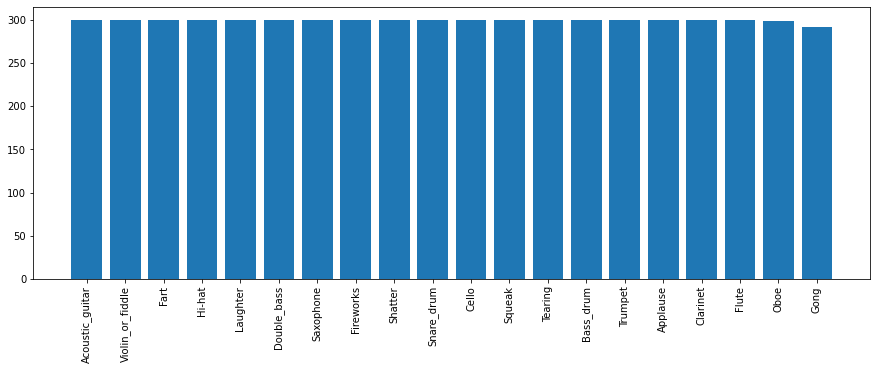

In [4]:
show_only = 20

train_labels = unique_labels[p][:show_only]
train_occurance = occurance[p][:show_only]

y_pos = np.arange(len(train_occurance))
plt.xticks(y_pos,train_labels,rotation=90)
plt.bar(y_pos,train_occurance)
plt.show()

Now we will repeat the same steps for test set meta data

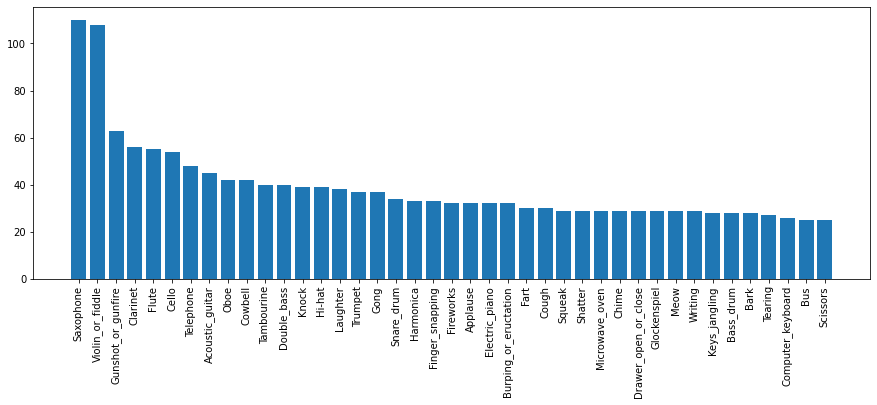

In [5]:
file = pd.read_csv("./data/FSDKaggle2018.meta/test_post_competition_scoring_clips.csv",usecols=['label'])

unique_labels,occurance = np.unique(file.values,return_counts=True)

p = (-occurance).argsort()

test_occurance = occurance[p]
test_labels = unique_labels[p]


y_pos = np.arange(len(test_occurance))

plt.xticks(y_pos,test_labels,rotation=90)
plt.bar(y_pos,test_occurance)
plt.show()

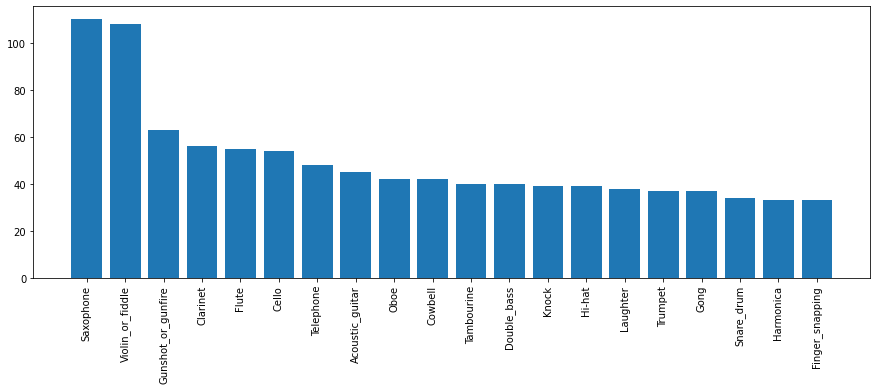

In [6]:
show_only = 20

y_pos = np.arange(len(test_occurance[:show_only]))
plt.xticks(y_pos,test_labels[:show_only],rotation=90)
plt.bar(y_pos,test_occurance[:show_only])
plt.show()

It can be seen that the number of samples in the test set is lower compared to the train set. 
Now using the sample number of train and test sets we can select which classes to use.
We select classes violin 🎻, saxophone 🎷, hihat 🎼, acoustic_guitar 🎸,laughter 🤣. 
Violin and saxophone are selected since their sample numbers are high. 
Hi-hat and guitar are selected due to being instruments. 
Laughter is includes because it is an interesting class. (It can be easily tested by recording a laughter)
Altough we have chosen this classes you are free to select anything 😃